In [1]:
import pandas as pd
from scipy.stats import kstest, shapiro
import numpy as np

wti = pd.read_csv("WTIdataok.csv")
brent = pd.read_csv("Brentdataok.csv")

In [2]:
wti

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,71.65,71.99,72.62,71.25,214.49K,-0.17%
1,12/28/2023,71.77,73.80,74.40,71.72,262.75K,-3.16%
2,12/27/2023,74.11,75.32,75.66,73.77,253.32K,-1.93%
3,12/26/2023,75.57,73.56,76.18,73.13,208.72K,2.41%
4,12/25/2023,73.79,73.49,73.94,73.48,NaN,0.31%
...,...,...,...,...,...,...,...
82,09/06/2023,87.54,86.72,88.08,85.93,307.12K,0.98%
83,09/05/2023,86.69,86.06,88.07,85.02,452.91K,1.01%
84,09/04/2023,85.82,85.85,86.14,85.28,NaN,-0.03%
85,09/03/2023,85.85,86.06,86.06,85.73,NaN,0.35%


In [ ]:
brent

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,77.04,77.38,77.98,76.73,192.95K,-1.72%
1,12/28/2023,78.39,79.80,79.95,78.25,18.78K,-1.58%
2,12/27/2023,79.65,80.79,81.33,79.29,70.39K,-1.75%
3,12/26/2023,81.07,79.04,81.72,78.76,59.74K,2.53%
4,12/22/2023,79.07,79.35,80.37,78.88,119.19K,-0.40%
...,...,...,...,...,...,...,...
80,09/07/2023,89.92,90.81,90.89,89.46,213.02K,-0.75%
81,09/06/2023,90.60,90.12,91.10,89.25,282.91K,0.62%
82,09/05/2023,90.04,88.91,91.15,88.06,428.45K,1.17%
83,09/04/2023,89.00,88.95,89.22,88.26,140.67K,0.51%


In [ ]:
dataprice = wti['Price']
datapriceNew = dataprice[::-1].reset_index()
datapriceNew
datapriceNew["rLog"] = np.log(datapriceNew['Price']) - np.log(datapriceNew['Price'].shift(1))
datapriceNew

,index,Price,rLog
0,86,85.55,NaN
1,85,85.85,0.003501
2,84,85.82,-0.000350
3,83,86.69,0.010086
4,82,87.54,0.009757
...,...,...,...
82,4,73.79,0.003122
83,3,75.57,0.023836
84,2,74.11,-0.019509
85,1,71.77,-0.032084


In [ ]:
dataprice1 = brent['Price']
datapriceNew1 = dataprice1[::-1].reset_index()
datapriceNew1
datapriceNew1["rLog"] = np.log(datapriceNew1['Price']) - np.log(datapriceNew1['Price'].shift(1))
datapriceNew1

,index,Price,rLog
0,84,88.55,NaN
1,83,89.00,0.005069
2,82,90.04,0.011618
3,81,90.60,0.006200
4,80,89.92,-0.007534
...,...,...,...
80,4,79.07,-0.004039
81,3,81.07,0.024979
82,2,79.65,-0.017671
83,1,78.39,-0.015946


In [ ]:
datapriceNew["Price"].describe()

count    87.000000
mean     81.127126
std       7.001553
min      68.610000
25%      75.095000
50%      82.310000
75%      87.400000
max      93.680000
Name: Price, dtype: float64

In [ ]:
datapriceNew1["Price"].describe()

count    85.000000
mean     85.258353
std       6.253404
min      73.240000
25%      79.980000
50%      85.180000
75%      90.640000
max      96.550000
Name: Price, dtype: float64

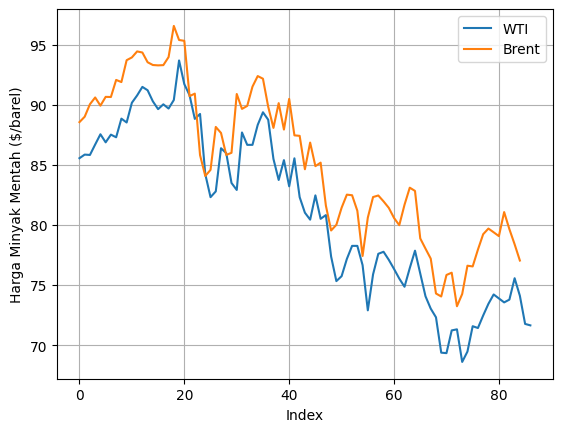

In [ ]:
import matplotlib.pyplot as plt

datapriceNew["Price"].plot()
datapriceNew1["Price"].plot(xlabel="Index", ylabel="Harga Minyak Mentah ($/barel)")
plt.legend(['WTI', 'Brent'], loc='upper right')
plt.grid()

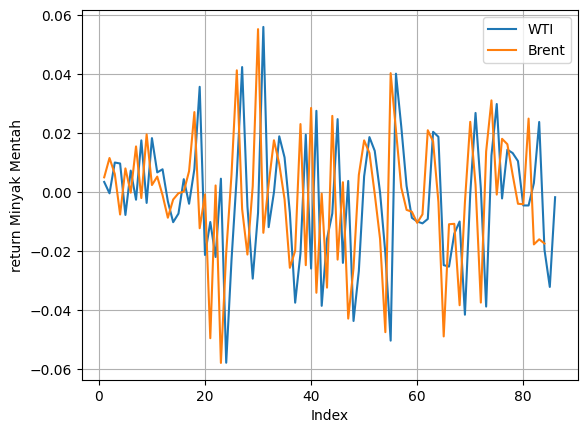

In [ ]:
datapriceNew["rLog"].plot(xlabel="Index", ylabel="return Minyak Mentah")
datapriceNew1["rLog"].plot()
plt.legend(['WTI', 'Brent'], loc='upper right')
plt.grid()

In [ ]:
datapriceNew1["rLog"][1:]

1     0.005069
2     0.011618
3     0.006200
4    -0.007534
5     0.008086
        ...   
80   -0.004039
81    0.024979
82   -0.017671
83   -0.015946
84   -0.017372
Name: rLog, Length: 84, dtype: float64

In [ ]:
from scipy.stats import kstest

normed_data=(datapriceNew["rLog"][1:]-datapriceNew["rLog"][1:].mean())/datapriceNew["rLog"][1:].std()
kstest(normed_data, 'norm')

KstestResult(statistic=0.07855625744706557, pvalue=0.6345391749176419, statistic_location=-0.3961474766734488, statistic_sign=-1)

In [ ]:
normed_data1=(datapriceNew1["rLog"][1:]-datapriceNew1["rLog"][1:].mean())/datapriceNew1["rLog"][1:].std()
kstest(normed_data1, 'norm')

KstestResult(statistic=0.08680088569090538, pvalue=0.5231116574573069, statistic_location=-0.1108982800936178, statistic_sign=-1)

In [ ]:
Iwt, Ibr = dict(), dict()
iterasi = [100, 1000, 50000]
for i in range(len(iterasi)):
  Iwt[i] = np.zeros((iterasi[i], 86))
  Ibr[i] = np.zeros((iterasi[i], 84))
  for j in range(iterasi[i]):
    Iwt[i][j] = np.random.standard_normal(86)
  for k in range(iterasi[i]):
    Ibr[i][k] = np.random.standard_normal(84)

In [ ]:
dt = 1
meanwti, sigmawti = np.mean(datapriceNew["rLog"][1:]), np.std(datapriceNew["rLog"][1:])
driftwti = meanwti + 0.5 * sigmawti**2
meanbrent, sigmabrent = np.mean(datapriceNew1["rLog"][1:]), np.std(datapriceNew1["rLog"][1:])
driftbrent = meanbrent + 0.5 * sigmabrent**2

In [ ]:
print("sigma wti ->", sigmawti)
print("drift wti ->", driftwti)
print("sigma brent ->", sigmabrent)
print("drift brent ->", driftbrent)

sigma wti -> 0.021263811221842854
drift wti -> -0.0018356443064402336
sigma brent -> 0.021344003417158402
drift brent -> -0.0014298667202424073


In [ ]:
def gen_paths(r, sigma, B, DATA):
    paths = dict()
    for a in range(len(iterasi)):
      paths[a] = np.zeros((iterasi[a], len(DATA)))
    for c in range(len(iterasi)):
      for i in range(iterasi[c]):
        paths[c][i][0] = DATA["Price"][0]
    for b in range(len(iterasi)):
      for t in range(0, iterasi[b]):
        for j in range(1, len(DATA)):
          paths[b][t][j] = paths[b][t][j - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * B[b][t][j-1])
    return paths

In [ ]:
paths = gen_paths(driftwti, sigmawti, Iwt, datapriceNew)
paths1 = gen_paths(driftbrent, sigmabrent, Ibr, datapriceNew1)

In [ ]:
prediksiGbm = dict()
prediksiGbm1 = dict()
for i in range(len(iterasi)):
  prediksiGbm[i] = pd.DataFrame(paths[i]).T
for i in range(len(iterasi)):
  prediksiGbm1[i] = pd.DataFrame(paths1[i]).T

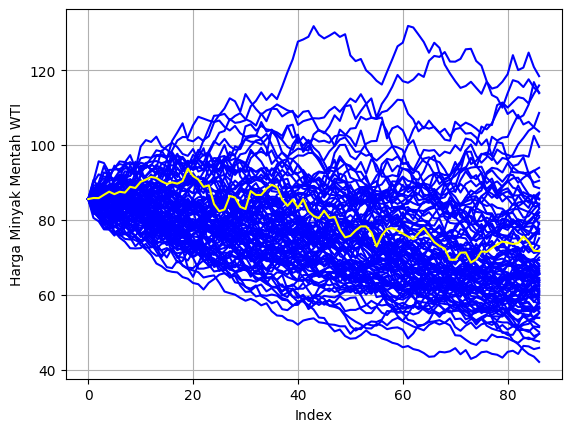

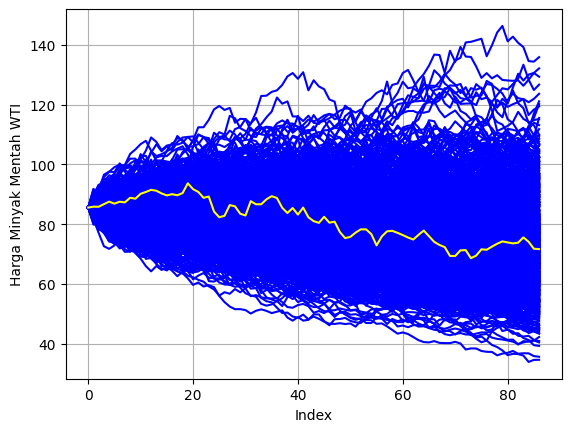

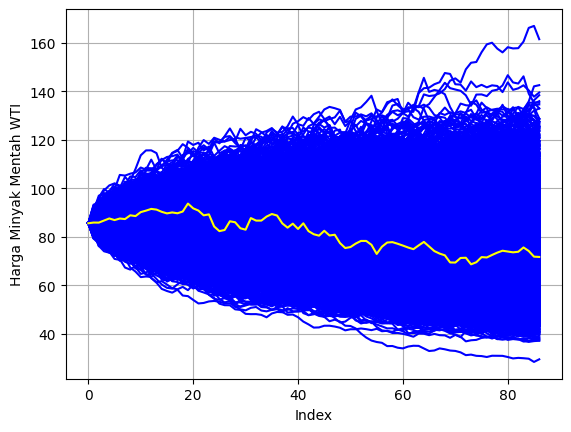

In [ ]:
for i in range(len(iterasi)):
  prediksiGbm[i].plot(color="blue", legend=None)
  datapriceNew["Price"].plot(color="yellow", xlabel="Index", ylabel="Harga Minyak Mentah WTI")
  plt.grid()

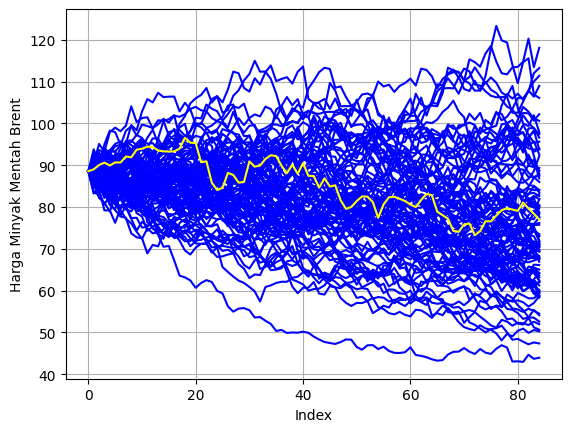

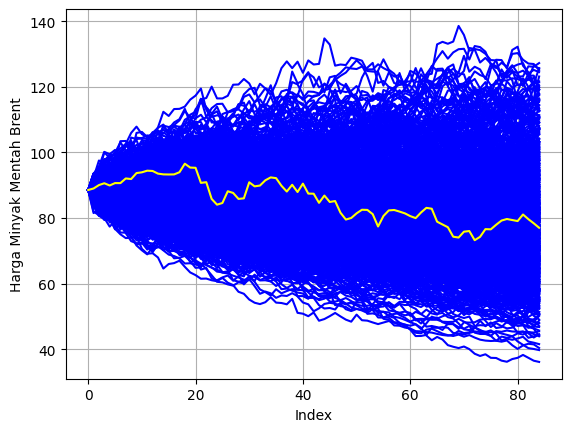

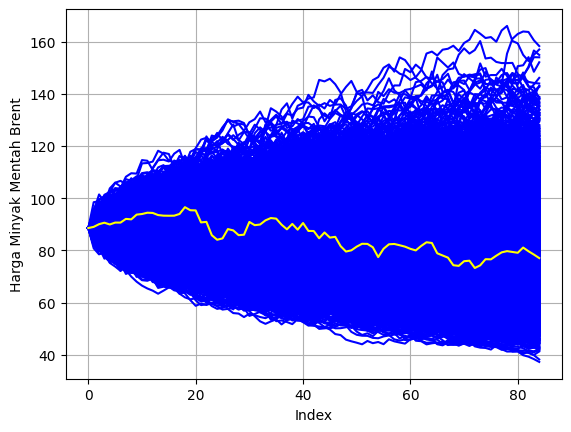

In [ ]:
for i in range(len(iterasi)):
  prediksiGbm1[i].plot(color="blue", legend=None)
  datapriceNew1["Price"].plot(color="yellow", xlabel="Index", ylabel="Harga Minyak Mentah Brent")
  plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mapeAll = dict()
mapeAll1 = dict()

for j in range(len(iterasi)):
  mapeAll[j] = np.array([])
  for i in range(iterasi[j]):
    evalGbm = mean_absolute_percentage_error(datapriceNew["Price"],prediksiGbm[j][i])
    mapeAll[j] = np.append(mapeAll[j], evalGbm)

for j in range(len(iterasi)):
  mapeAll1[j] = np.array([])
  for i in range(iterasi[j]):
    evalGbm1 = mean_absolute_percentage_error(datapriceNew1["Price"],prediksiGbm1[j][i])
    mapeAll1[j] = np.append(mapeAll1[j], evalGbm1)

In [ ]:
bModel = dict()
bModel1 = dict()

for i in range(len(iterasi)):
  bModel[i] = np.where(mapeAll[i] == mapeAll[i].min())
  print(f"MAPE WTI minimum Iterasi {iterasi[i]} -> {mapeAll[i].min()}")

for i in range(len(iterasi)):
  bModel1[i] = np.where(mapeAll1[i] == mapeAll1[i].min())
  print(f"MAPE Brent minimum Iterasi {iterasi[i]} -> {mapeAll1[i].min()}")

MAPE WTI minimum Iterasi 100 -> 0.043109233694562675
MAPE WTI minimum Iterasi 1000 -> 0.028593603707052117
MAPE WTI minimum Iterasi 50000 -> 0.024451347385079803
MAPE Brent minimum Iterasi 100 -> 0.03646827346253012
MAPE Brent minimum Iterasi 1000 -> 0.033184480667758635
MAPE Brent minimum Iterasi 50000 -> 0.024694761248816016


In [ ]:
bModel

{0: (array([11]),), 1: (array([556]),), 2: (array([26228]),)}

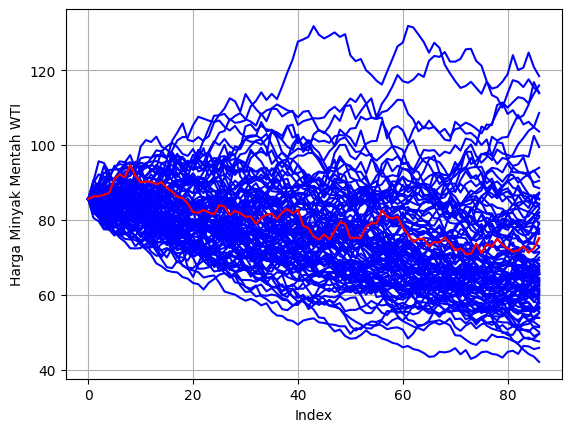

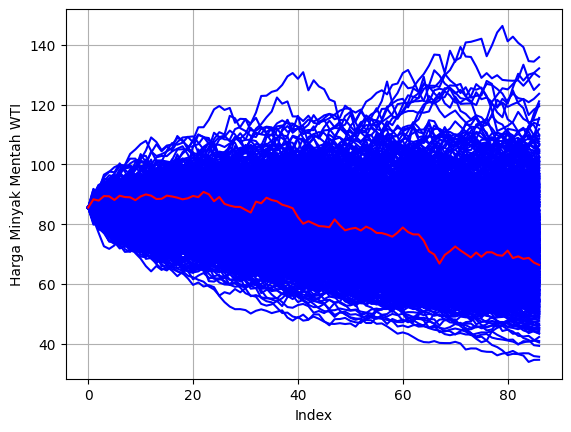

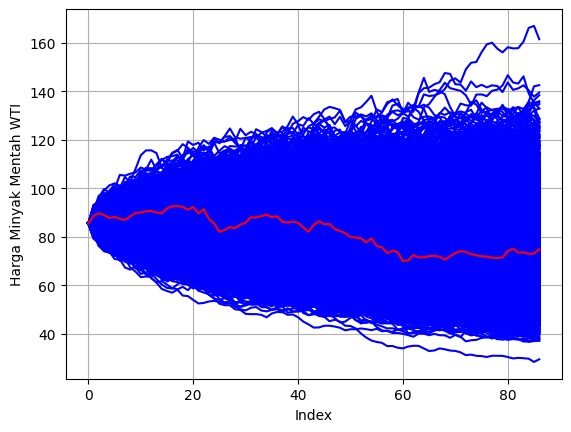

In [ ]:
for i in range(len(iterasi)):
  prediksiGbm[i].plot(color="blue", legend=None)
  prediksiGbm[i][bModel[i][0][0]].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI")
  plt.grid()

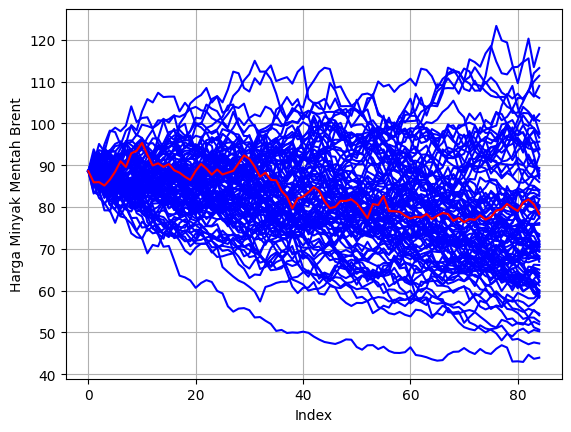

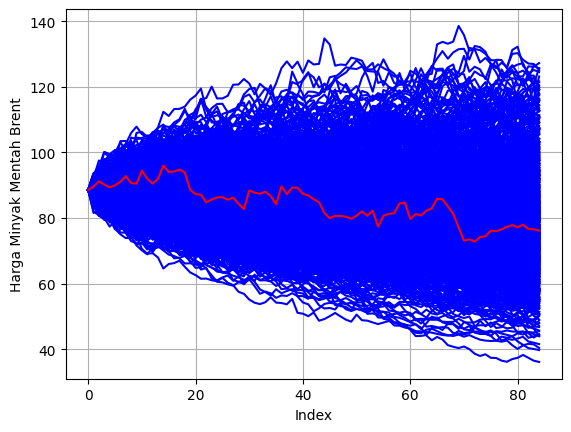

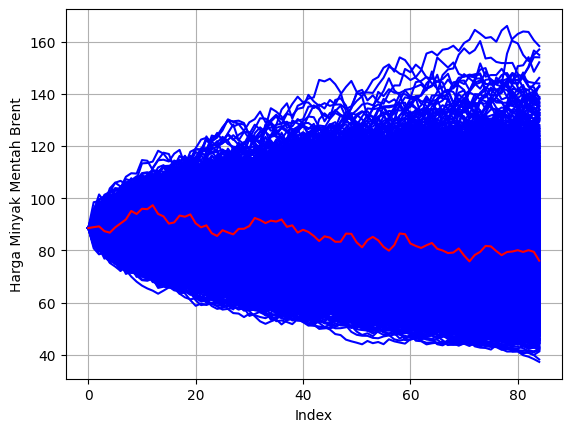

In [ ]:
for i in range(len(iterasi)):
  prediksiGbm1[i].plot(color="blue", legend=None)
  prediksiGbm1[i][bModel1[i][0][0]].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah Brent")
  plt.grid()

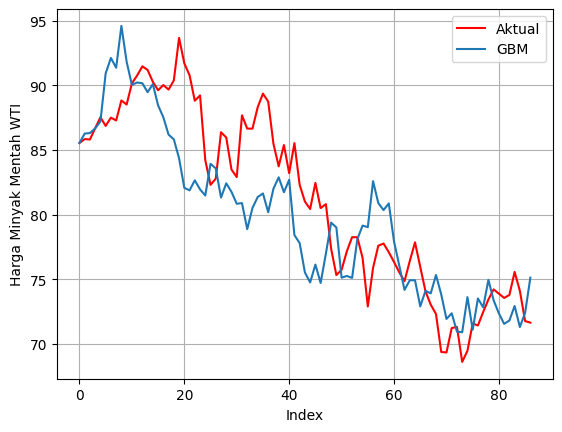

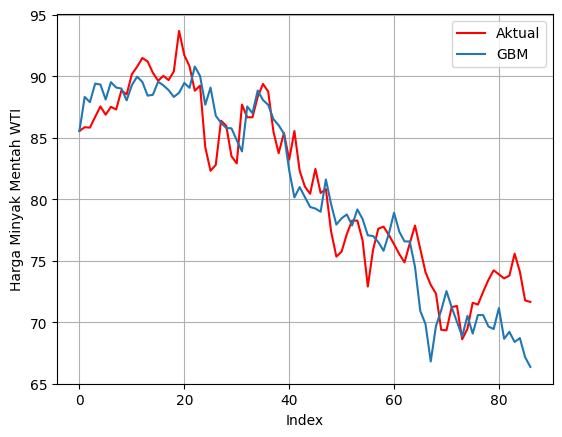

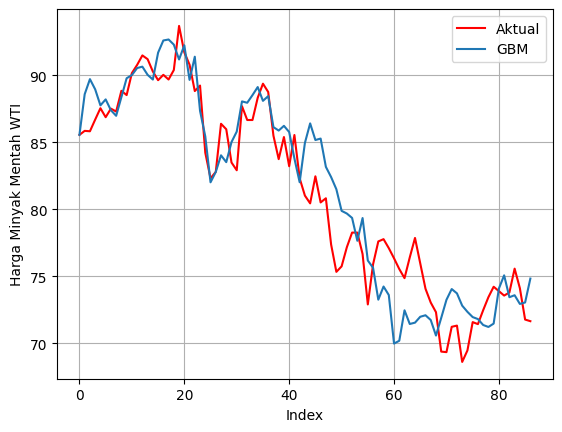

In [ ]:
for i in range(len(iterasi)):
  b = datapriceNew["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI" )
  a = prediksiGbm[i][bModel[i][0][0]].plot()
  plt.legend(['Aktual', 'GBM'], loc='upper right')
  plt.grid()
  plt.show()

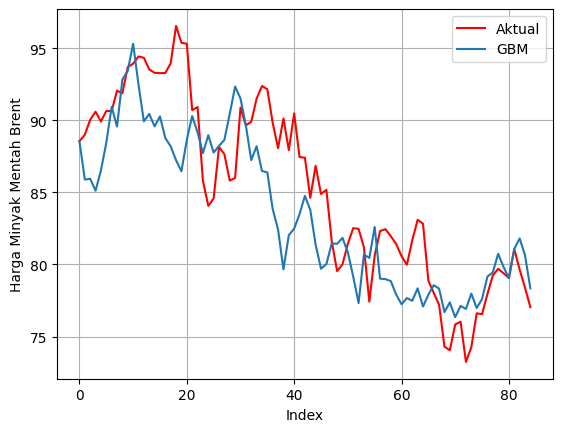

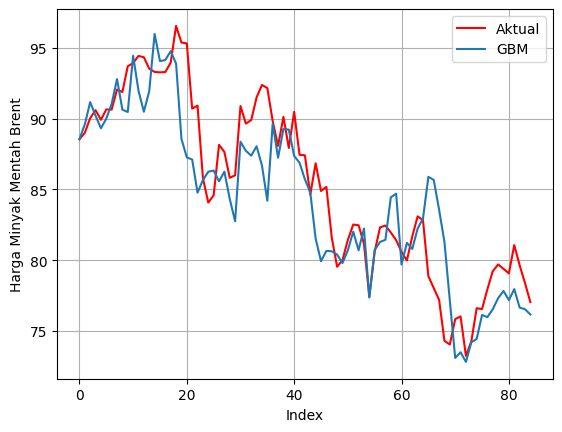

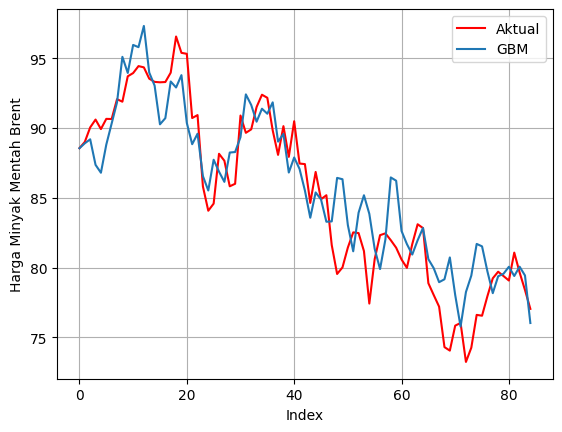

In [ ]:
for i in range(len(iterasi)):
  b = datapriceNew1["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah Brent" )
  a = prediksiGbm1[i][bModel1[i][0][0]].plot()
  plt.legend(['Aktual', 'GBM'], loc='upper right')
  plt.grid()
  plt.show()

In [ ]:
dt = 1

A = np.array([[1, 0, 0],
              [0, 1, 0],
              [dt, sigmawti*dt, 1]])
A1 = np.array([[1, 0, 0],
              [0, 1, 0],
              [dt, sigmabrent*dt, 1]])

H = np.array([dt, sigmawti*dt, 1])
H1 = np.array([dt, sigmabrent*dt, 1])

xk = np.array([[driftwti],
              [sigmawti],
              [np.log(datapriceNew["Price"][0])]])
xkb = np.array([[driftbrent],
              [sigmabrent],
              [np.log(datapriceNew1["Price"][0])]])

Pk = np.identity(3) * 1e-5

Qk = np.identity(3) * 1e-5

Rk = 1e-5

In [ ]:
zkwk = np.random.normal(size=len(datapriceNew), scale = Rk)
zk = np.zeros(len(datapriceNew))
zkwk1 = np.random.normal(size=len(datapriceNew1), scale = Rk)
zk1 = np.zeros(len(datapriceNew1))

zk[0] = datapriceNew["Price"][0]
for i in range(len(datapriceNew)):
  zk[i] = H.dot(np.array([[driftwti],
              [sigmawti],
              [np.log(prediksiGbm[2][bModel[2][0][0]][i])]])) + zkwk[i]
zk1[0] = datapriceNew1["Price"][0]
for i in range(len(datapriceNew1)):
  zk1[i] = H.dot(np.array([[driftbrent],
              [sigmabrent],
              [np.log(prediksiGbm1[2][bModel1[2][0][0]][i])]])) + zkwk1[i]

zkdf = pd.DataFrame(np.exp(zk))
zkdf1 = pd.DataFrame(np.exp(zk1))

<ipython-input-69-2f1a4b6e43e7>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zk[i] = H.dot(np.array([[driftwti],
<ipython-input-69-2f1a4b6e43e7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zk1[i] = H.dot(np.array([[driftbrent],


Mape -> 0.026833080341114635


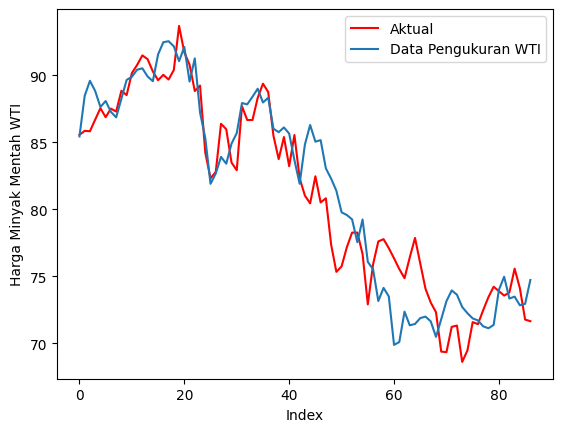

In [ ]:
mapewti = mean_absolute_percentage_error(datapriceNew["Price"],np.exp(zk))
print(f"Mape -> {mapewti}")
datapriceNew["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI" )
zkdf[0].plot()
plt.legend(['Aktual', "Data Pengukuran WTI"],
            loc='upper right')

Mape -> 0.02435577690845417


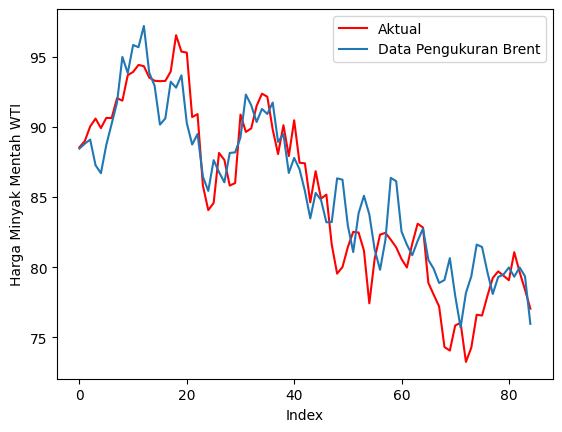

In [ ]:
mapebrent = mean_absolute_percentage_error(datapriceNew1["Price"],np.exp(zk1))
print(f"Mape -> {mapebrent}")
datapriceNew1["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI" )
zkdf1[0].plot()
plt.legend(['Aktual', "Data Pengukuran Brent"],
            loc='upper right')

In [ ]:
ukwwk = np.random.normal(size=len(datapriceNew)-1, scale = Rk)
wkwk = np.zeros(len(datapriceNew)-1)
for i in range(len(datapriceNew)-1):
  wkwk[i] = H.dot(np.array([[0],
              [0],
              [sigmawti*ukwwk[i]]]))

ukwwk1 = np.random.normal(size=len(datapriceNew1)-1, scale = Rk)
wkwk1 = np.zeros(len(datapriceNew1)-1)
for i in range(len(datapriceNew1)-1):
  wkwk1[i] = H.dot(np.array([[0],
              [0],
              [sigmabrent*ukwwk1[i]]]))

<ipython-input-72-8db0ae5b3fa7>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wkwk[i] = H.dot(np.array([[0],
<ipython-input-72-8db0ae5b3fa7>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wkwk1[i] = H.dot(np.array([[0],


In [ ]:
Hasil = np.array([xk[2][0]])
Hasil1 = np.array([xkb[2][0]])

for i in range(len(datapriceNew)-1):
  x_hat_k = A.dot(xk) + wkwk[i]
  P_k = A.dot(Pk).dot(A.transpose()) + Qk
  KG = P_k.dot(H.reshape(H.size, 1))*((H.dot(P_k).dot(H.reshape(H.size, 1)) + Rk)**-1)
  xk1 = x_hat_k + KG*(zk[i+1] - H.dot(x_hat_k))
  P_k1 = (np.identity(3) - KG.dot(np.array([H]))).dot(P_k)
  Hasil = np.append(Hasil, xk1[2][0])
  xk = xk1
  Pk = P_k1

xkpredwti = xk
Pkpredwti = Pk

Pk = np.identity(3) * 1e-5
for i in range(len(datapriceNew1)-1):
  x_hat_k = A1.dot(xkb) + wkwk1[i]
  P_k = A1.dot(Pk).dot(A1.transpose()) + Qk
  KG = P_k.dot(H1.reshape(H1.size, 1))*((H1.dot(P_k).dot(H1.reshape(H1.size, 1)) + Rk)**-1)
  xk1 = x_hat_k + KG*(zk1[i+1] - H1.dot(x_hat_k))
  P_k1 = (np.identity(3) - KG.dot(np.array([H1]))).dot(P_k)
  Hasil1 = np.append(Hasil1, xk1[2][0])
  xkb = xk1
  Pk = P_k1

xkpredbrent = xkb
Pkpredbrent = Pk

In [ ]:
np.exp(Hasil)

array([85.55      , 86.99425586, 88.24092398, 88.72877496, 88.37754122,
       88.17735447, 87.77566709, 87.3243246 , 87.59957488, 88.47775174,
       89.22290527, 89.84575433, 90.23759711, 90.1814372 , 89.91511981,
       90.51246781, 91.41891255, 92.05146369, 92.21757333, 91.77809365,
       91.81517248, 90.90716027, 90.85468227, 89.38504964, 87.43419345,
       84.79745946, 83.41979551, 83.35479133, 83.37378518, 83.9817208 ,
       84.78621461, 86.19401922, 87.13665285, 87.82207065, 88.42551976,
       88.36340339, 88.32571979, 87.38559718, 86.53324363, 86.19439733,
       85.91270026, 84.95507106, 83.5249909 , 83.7545712 , 84.82402272,
       85.13823589, 85.20065644, 84.34477517, 83.33718741, 82.34929225,
       81.11458349, 80.24788791, 79.67749997, 78.70680297, 78.72019199,
       77.66438117, 76.58348659, 74.98304157, 74.32106842, 73.87123896,
       72.16438467, 70.98059531, 71.29856711, 71.39632764, 71.43095926,
       71.61578391, 71.80517648, 71.77572522, 71.24673516, 71.35

In [ ]:
np.exp(Hasil1)

array([88.55      , 88.68151725, 88.86696866, 88.26515965, 87.50993034,
       87.83739954, 88.86475591, 90.22251014, 92.38723113, 93.42091903,
       94.58282357, 95.26303075, 96.1699956 , 95.43028466, 94.26429297,
       92.37456552, 91.28692073, 91.85139685, 92.36540011, 92.99476027,
       92.02304812, 90.49195111, 89.78576483, 88.3135583 , 86.85486823,
       86.87648561, 86.85997905, 86.53186401, 87.10615277, 87.66397323,
       88.4082016 , 90.10366686, 91.03802324, 90.94426748, 91.0517986 ,
       91.02773755, 91.30728552, 90.41015168, 89.84946334, 88.47940465,
       87.92548632, 87.44648297, 86.54268199, 85.12558099, 84.90677266,
       84.83412552, 84.16411193, 83.64678553, 84.60995049, 85.47129532,
       84.62944884, 83.00964707, 83.0125116 , 83.85841856, 83.99985153,
       82.91175355, 81.43302954, 81.33733468, 83.30956135, 84.85823985,
       84.22815575, 83.02121162, 81.90489469, 81.67053134, 82.06484012,
       81.53046373, 80.74802242, 79.8369319 , 79.35229642, 79.77

In [ ]:
mapewti = mean_absolute_percentage_error(datapriceNew["Price"],np.exp(Hasil))
mapebrent = mean_absolute_percentage_error(datapriceNew1["Price"],np.exp(Hasil1))
print(f"Mape WTI GBM-KF -> {mapewti}")
print(f"Mape Brent GBM-KF -> {mapebrent}")

Mape WTI GBM-KF -> 0.025713491333308188
Mape Brent GBM-KF -> 0.022522354727098678


In [ ]:
hasil = pd.DataFrame(np.exp(Hasil))
hasil1 = pd.DataFrame(np.exp(Hasil1))

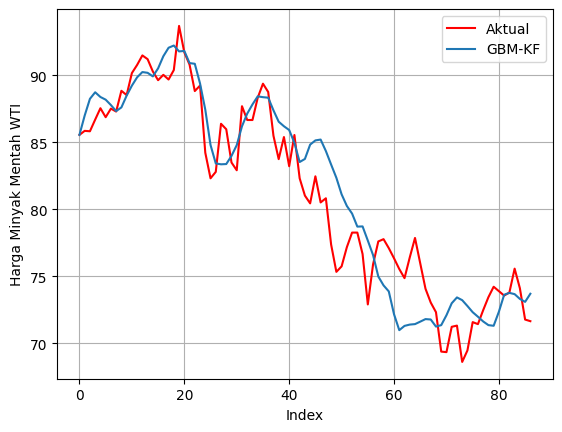

In [ ]:
a = datapriceNew["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI" )
b = hasil[0].plot()
plt.legend(['Aktual', "GBM-KF"],
            loc='upper right')
plt.grid()

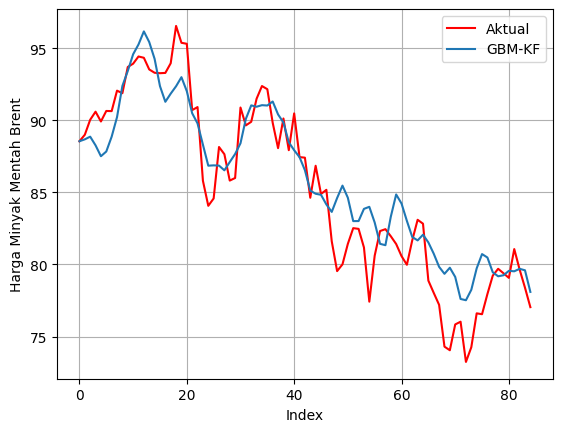

In [ ]:
a = datapriceNew1["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah Brent" )
b = hasil1[0].plot()
plt.legend(['Aktual', "GBM-KF"],
            loc='upper right')
plt.grid()

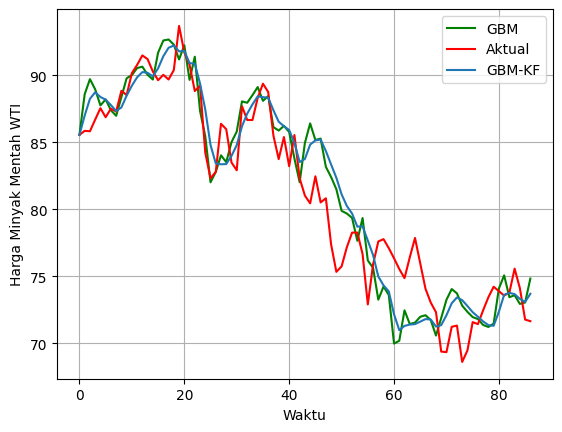

In [ ]:
a = prediksiGbm[2][bModel[2][0][0]].plot(color="green")
b = datapriceNew["Price"].plot(color="red", xlabel="Waktu", ylabel="Harga Minyak Mentah WTI" )
c = hasil[0].plot()
plt.legend(['GBM', 'Aktual', "GBM-KF"],
            loc='upper right')
plt.grid()

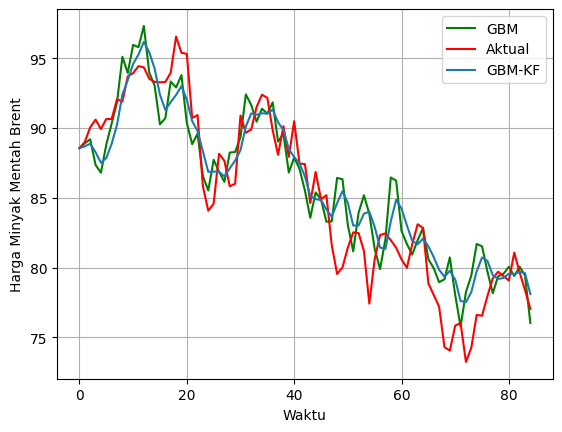

In [ ]:
a = prediksiGbm1[2][bModel1[2][0][0]].plot(color="green")
b = datapriceNew1["Price"].plot(color="red", xlabel="Waktu", ylabel="Harga Minyak Mentah Brent" )
c = hasil1[0].plot()
plt.legend(['GBM', 'Aktual', "GBM-KF"],
            loc='upper right')
plt.grid()

In [ ]:
wtipred = pd.read_csv("WTIdatajan.csv")
brentpred = pd.read_csv("Brentdatajan.csv")

<Axes: >

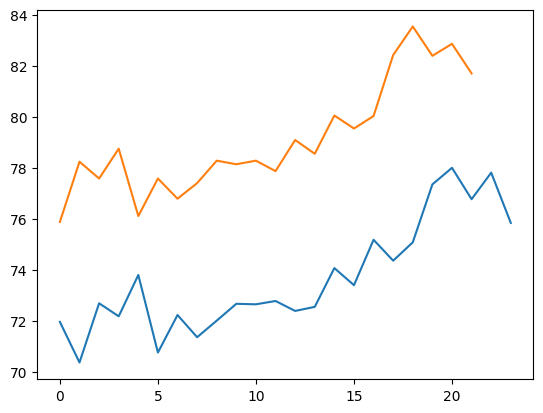

In [ ]:
datapredprice = wtipred['Price']
datapredpriceNew = datapredprice[::-1].reset_index()
datapredprice1 = brentpred['Price']
datapredpriceNew1 = datapredprice1[::-1].reset_index()

datapredpriceNew["Price"].plot()
datapredpriceNew1["Price"].plot()

In [ ]:
dt = 1

A = np.array([[1, 0, 0],
              [0, 1, 0],
              [dt, sigmawti*dt, 1]])
A1 = np.array([[1, 0, 0],
              [0, 1, 0],
              [dt, sigmabrent*dt, 1]])

H = np.array([dt, sigmawti*dt, 1])
H1 = np.array([dt, sigmabrent*dt, 1])

xk = xkpredwti
xkb = xkpredbrent

Pk = Pkpredwti
Pk1 = Pkpredbrent

Qk = np.identity(3) * 1e-5

Rk = 1e-5

Mape WTI -> 0.032145182550484014


<Axes: >

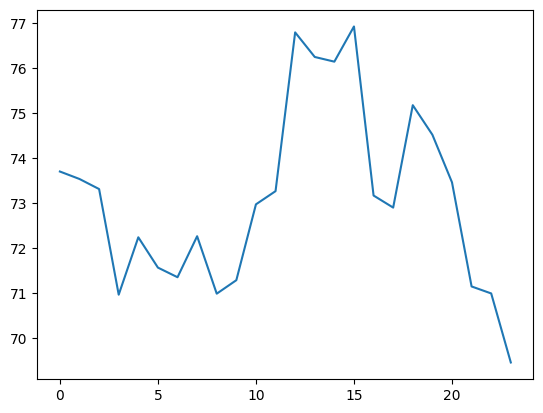

In [ ]:
ukw = np.random.normal(size=len(datapredpriceNew), scale = 1)
zkwpred = np.zeros(len(datapredpriceNew))
zkwpred[0] = np.exp(xkpredwti[2][0])
for j in range(1, len(datapredpriceNew)):
  zkwpred[j] = zkwpred[j - 1] * np.exp((driftwti - 0.5 * sigmawti ** 2) * dt + sigmawti * np.sqrt(dt) * ukw[j-1])
zkwpredh = pd.DataFrame(zkwpred)
mapewti = mean_absolute_percentage_error(datapredpriceNew["Price"],zkwpred)
print(f"Mape WTI -> {mapewti}")
zkwpredh[0].plot()

Mape Brent -> 0.025133656354886735


<Axes: >

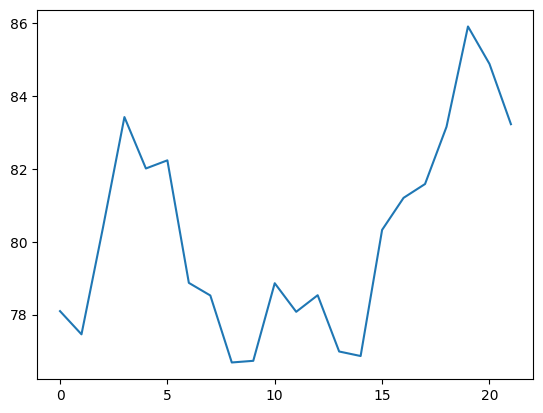

In [ ]:
ukw1 = np.random.normal(size=len(datapredpriceNew1), scale = 1)
zkwpred1 = np.zeros(len(datapredpriceNew1))
zkwpred1[0] = np.exp(xkpredbrent[2][0])
for j in range(1, len(datapredpriceNew1)):
  zkwpred1[j] = zkwpred1[j - 1] * np.exp((driftbrent - 0.5 * sigmabrent ** 2) * dt + sigmabrent * np.sqrt(dt) * ukw1[j-1])
zkwpredh1 = pd.DataFrame(zkwpred1)
mapebrent = mean_absolute_percentage_error(datapredpriceNew1["Price"],zkwpred1)
print(f"Mape Brent -> {mapebrent}")
zkwpredh1[0].plot()

<ipython-input-127-9d459f89b896>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zkw[i] = H.dot(np.array([[driftwti],


Mape WTI GBM -> 0.03218884412909273


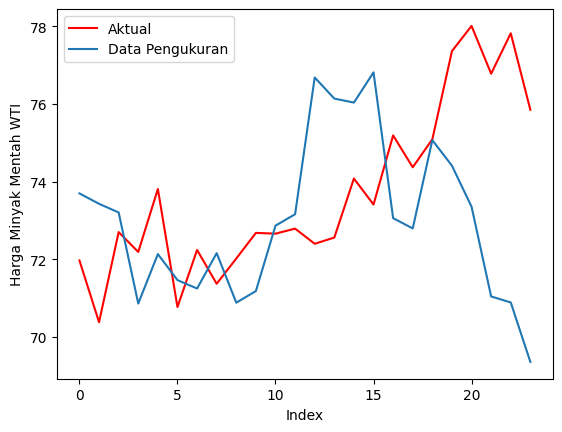

In [ ]:
ukww = np.random.normal(size=len(datapredpriceNew), scale = Rk)
zkw = np.zeros(len(datapredpriceNew))
zkw[0] = xkpredwti[2][0]
for i in range(1, len(datapredpriceNew)):
  zkw[i] = H.dot(np.array([[driftwti],
              [sigmawti],
              [np.log(zkwpred[i])]])) + ukww[i]
zkww = pd.DataFrame(np.exp(zkw))
mapewti = mean_absolute_percentage_error(datapredpriceNew["Price"],np.exp(zkw))
print(f"Mape WTI GBM -> {mapewti}")
datapredpriceNew["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI" )
zkww[0].plot()
plt.legend(['Aktual', "Data Pengukuran"],
            loc='upper left')

Mape WTI GBM -> 0.024886973491765652


<ipython-input-128-c5c0f466ac4f>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zkw1[i] = H.dot(np.array([[driftbrent],


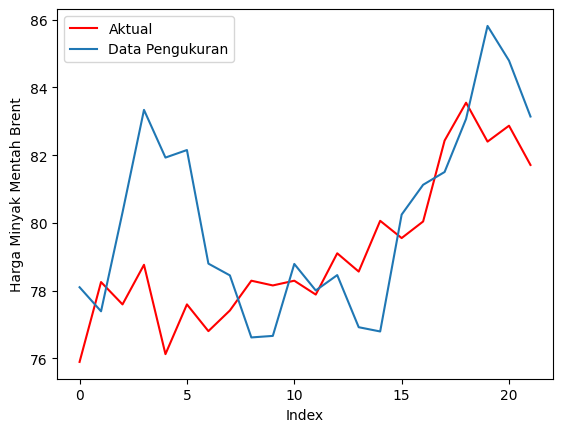

In [ ]:
ukww1 = np.random.normal(size=len(datapredpriceNew1), scale = Rk)
zkw1 = np.zeros(len(datapredpriceNew1))
zkw1[0] = xkpredbrent[2][0]
for i in range(1, len(datapredpriceNew1)):
  zkw1[i] = H.dot(np.array([[driftbrent],
              [sigmabrent],
              [np.log(zkwpred1[i])]])) + ukww1[i]
zkww1 = pd.DataFrame(np.exp(zkw1))
mapebrent = mean_absolute_percentage_error(datapredpriceNew1["Price"],np.exp(zkw1))
print(f"Mape WTI GBM -> {mapebrent}")
datapredpriceNew1["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah Brent" )
zkww1[0].plot()
plt.legend(['Aktual', "Data Pengukuran"],
            loc='upper left')

In [ ]:
ukwwk = np.random.normal(size=len(datapredpriceNew)-1, scale = Rk)
ukwwk1 = np.random.normal(size=len(datapredpriceNew1)-1, scale = Rk)

wkwk = np.zeros(len(datapredpriceNew)-1)
wkwk1 = np.zeros(len(datapredpriceNew1)-1)

for i in range(len(datapredpriceNew)-1):
  wkwk[i] = H.dot(np.array([[0],
              [0],
              [sigmawti*ukwwk[i]]]))

for i in range(len(datapredpriceNew1)-1):
  wkwk1[i] = H.dot(np.array([[0],
              [0],
              [sigmabrent*ukwwk1[i]]]))

<ipython-input-129-fab5c99a3d75>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wkwk[i] = H.dot(np.array([[0],
<ipython-input-129-fab5c99a3d75>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wkwk1[i] = H.dot(np.array([[0],


In [ ]:
Hasil = np.array([xkpredwti[2][0]])
Hasil1 = np.array([xkpredbrent[2][0]])

for i in range(len(datapredpriceNew)-1):
  x_hat_k = A.dot(xk) + wkwk[i]
  P_k = A.dot(Pk).dot(A.transpose()) + Qk
  KG = P_k.dot(H.reshape(H.size, 1))*((H.dot(P_k).dot(H.reshape(H.size, 1)) + Rk)**-1)
  xk1 = x_hat_k + KG*(zkw[i+1] - H.dot(x_hat_k))
  P_k1 = (np.identity(3) - KG.dot(np.array([H]))).dot(P_k)
  Hasil = np.append(Hasil, xk1[2][0])
  xk = xk1
  Pk = P_k1

for i in range(len(datapredpriceNew1)-1):
  x_hat_k = A.dot(xk) + wkwk1[i]
  P_k = A.dot(Pk1).dot(A.transpose()) + Qk
  KG = P_k.dot(H.reshape(H.size, 1))*((H.dot(P_k).dot(H.reshape(H.size, 1)) + Rk)**-1)
  xk1 = x_hat_k + KG*(zkw1[i+1] - H.dot(x_hat_k))
  P_k1 = (np.identity(3) - KG.dot(np.array([H]))).dot(P_k)
  Hasil1 = np.append(Hasil1, xk1[2][0])
  xk = xk1
  Pk1 = P_k1

Mape WTI GBM-KF -> 0.02593421408952894


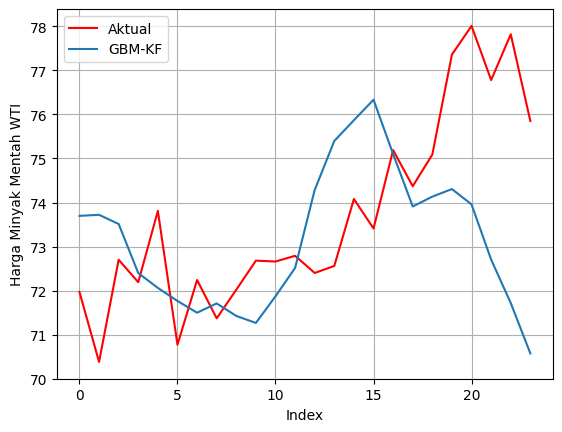

In [ ]:
np.exp(Hasil)
mapewti = mean_absolute_percentage_error(datapredpriceNew["Price"],np.exp(Hasil))
print(f"Mape WTI GBM-KF -> {mapewti}")
hasil = pd.DataFrame(np.exp(Hasil))
a = datapredpriceNew["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah WTI" )
b = hasil[0].plot()
plt.legend(['Aktual', "GBM-KF"],
            loc='upper left')
plt.grid()

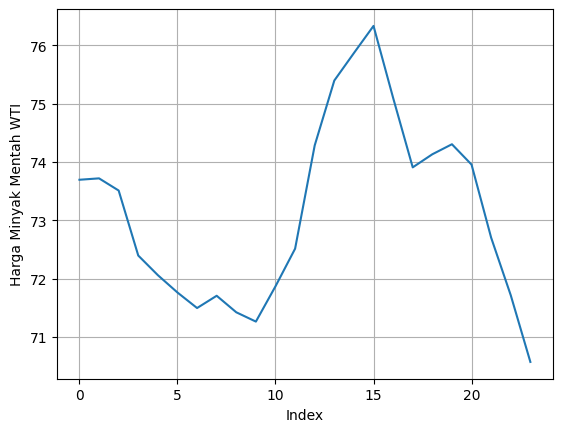

In [ ]:
hasil[0].plot(xlabel="Index", ylabel="Harga Minyak Mentah WTI")
plt.grid()

Mape Brent GBM-KF -> 0.02431926857755625


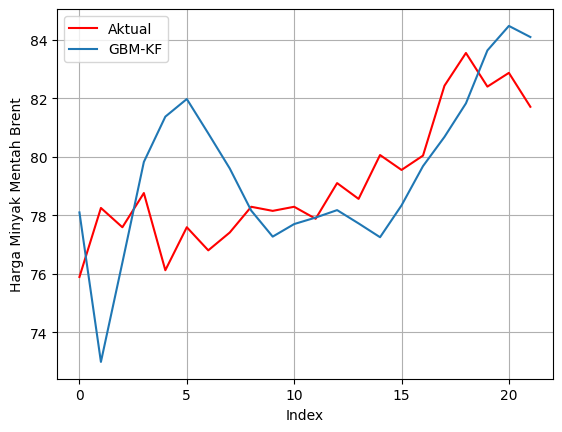

In [ ]:
np.exp(Hasil1)
mapewti = mean_absolute_percentage_error(datapredpriceNew1["Price"],np.exp(Hasil1))
print(f"Mape Brent GBM-KF -> {mapewti}")
hasil1 = pd.DataFrame(np.exp(Hasil1))
a = datapredpriceNew1["Price"].plot(color="red", xlabel="Index", ylabel="Harga Minyak Mentah Brent" )
b = hasil1[0].plot()
plt.legend(['Aktual', "GBM-KF"],
            loc='upper left')
plt.grid()

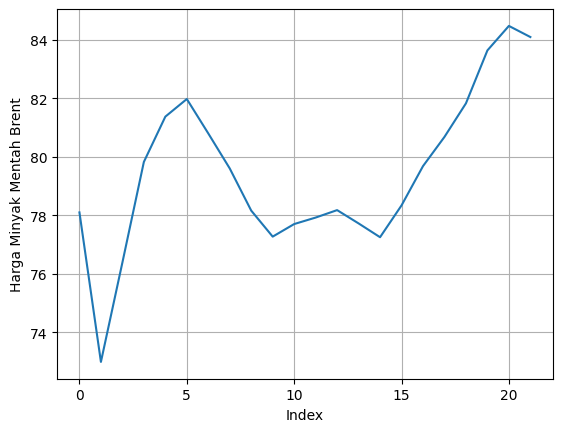

In [ ]:
hasil1[0].plot(xlabel="Index", ylabel="Harga Minyak Mentah Brent")
plt.grid()

In [ ]:
hasil

,0
0,73.696731
1,73.720525
2,73.511980
3,72.397289
4,72.060837
5,71.763566
6,71.497383
7,71.707859
8,71.424358
9,71.264978


In [ ]:
hasil1

,0
0,78.096979
1,72.983790
2,76.382648
3,79.823664
4,81.372614
5,81.975521
6,80.798994
7,79.600544
8,78.158884
9,77.269161
